In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Cardiotocographic.csv')

In [67]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,NaN,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
## Replacing Missing Values with median

In [7]:
df['LB'].median()

133.0

In [8]:
df['LB']=df['LB'].fillna(df['LB'].median())

In [9]:
df['AC']=df['AC'].fillna(df['AC'].median())

In [10]:
df['DS']=df['DS'].fillna(df['DS'].median())

In [11]:
df['DP']=df['DP'].fillna(df['DP'].median())

In [12]:
df['MLTV']=df['MLTV'].fillna(df['MLTV'].median())

In [13]:
df['Width']=df['Width'].fillna(df['Width'].median())

In [14]:
df['Tendency']=df['Tendency'].fillna(df['Tendency'].median())

In [15]:
df['NSP']=df['NSP'].fillna(df['NSP'].median())

In [16]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

## Boxplots

<Axes: xlabel='AC'>

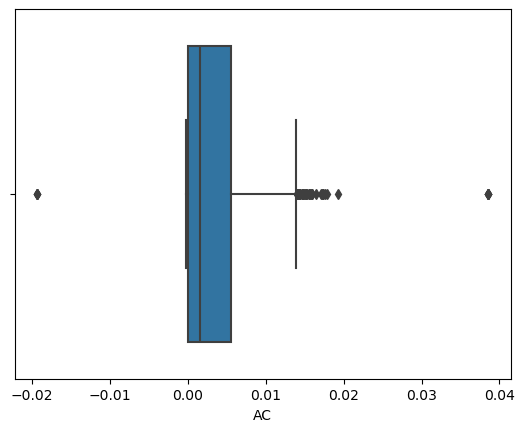

In [17]:
sns.boxplot(data=df,x='AC')

<Axes: xlabel='FM'>

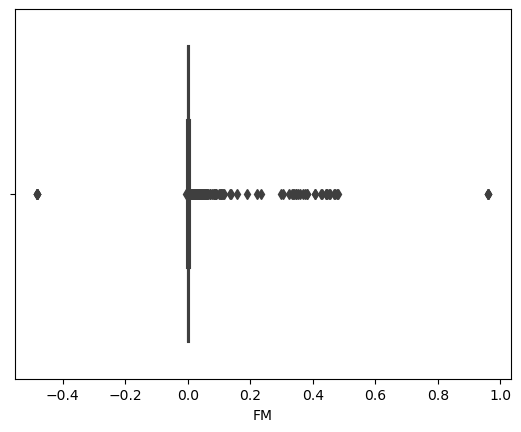

In [18]:
sns.boxplot(data=df,x='FM')

<Axes: xlabel='DL'>

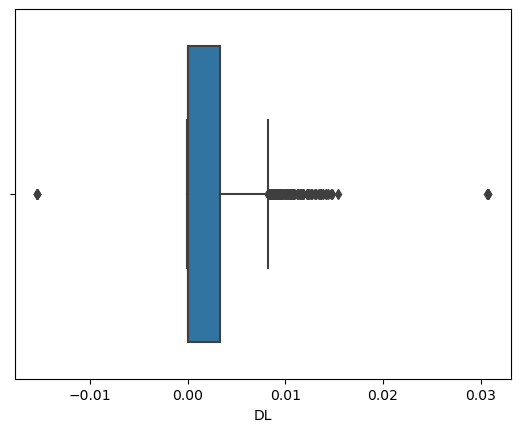

In [19]:
sns.boxplot(data=df,x='DL')

<Axes: xlabel='DS'>

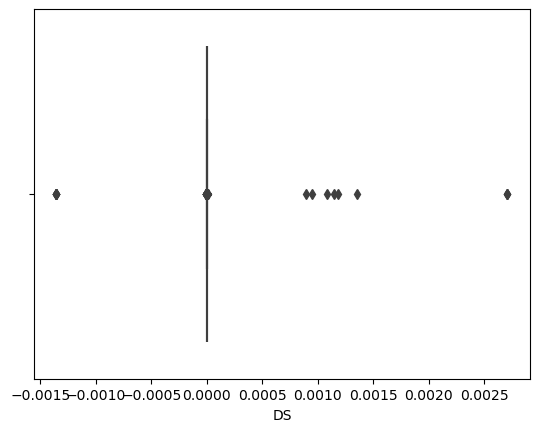

In [20]:
sns.boxplot(data=df,x='DS')

<Axes: xlabel='DP'>

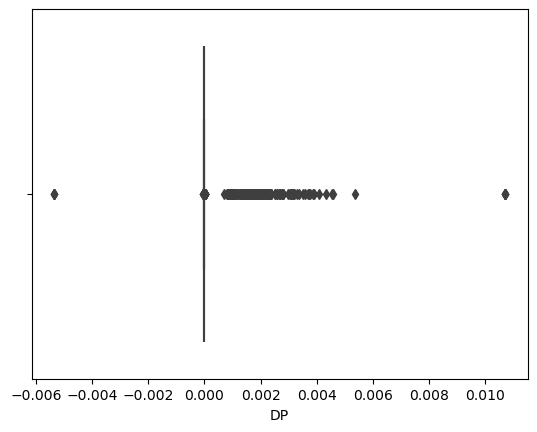

In [21]:
sns.boxplot(data=df,x='DP')

<Axes: xlabel='MSTV'>

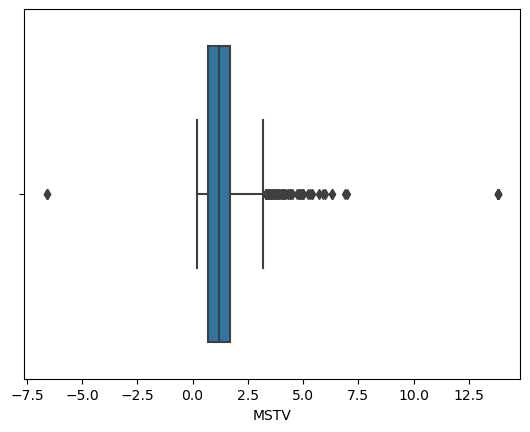

In [22]:
sns.boxplot(data=df,x='MSTV')

<Axes: xlabel='ALTV'>

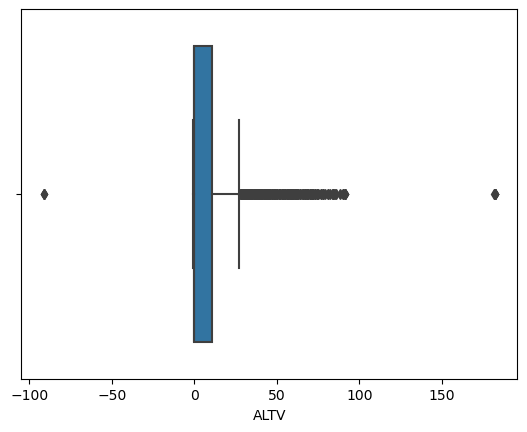

In [23]:
sns.boxplot(data=df,x='ALTV')

<Axes: xlabel='MLTV'>

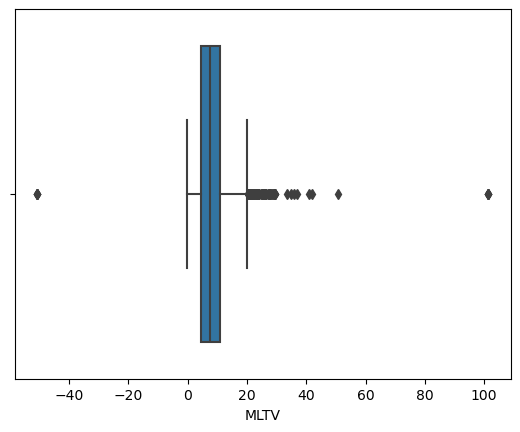

In [24]:
sns.boxplot(data=df,x='MLTV')

<Axes: xlabel='NSP'>

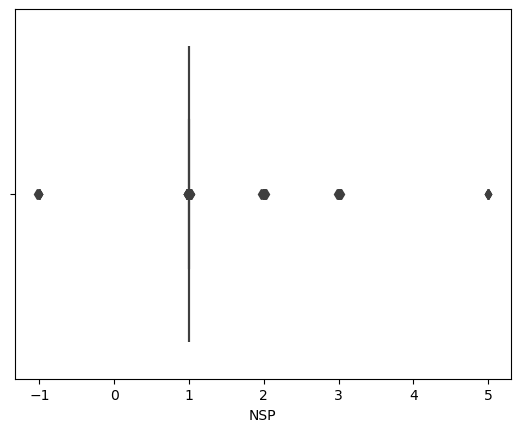

In [25]:
sns.boxplot(data=df,x='NSP')

## Removing Outliers

In [87]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
   
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    ls= df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [88]:
index_list=[]
for feature in ['AC','FM','DL','DS','DP','MSTV','ALTV','MLTV','NSP']:
    index_list.extend(outliers(df,feature))

In [89]:
index_list

[494,
 499,
 620,
 629,
 675,
 677,
 993,
 1031,
 1032,
 1067,
 1415,
 1487,
 1691,
 1692,
 1856,
 1865,
 46,
 47,
 48,
 54,
 60,
 61,
 71,
 72,
 73,
 74,
 78,
 89,
 92,
 94,
 103,
 107,
 109,
 111,
 112,
 113,
 167,
 214,
 215,
 216,
 217,
 219,
 226,
 227,
 228,
 230,
 232,
 233,
 235,
 237,
 238,
 239,
 241,
 242,
 245,
 249,
 283,
 284,
 285,
 290,
 291,
 293,
 307,
 309,
 310,
 311,
 314,
 329,
 330,
 331,
 335,
 343,
 347,
 354,
 384,
 388,
 427,
 430,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 471,
 473,
 486,
 487,
 489,
 506,
 507,
 508,
 512,
 520,
 541,
 550,
 582,
 583,
 585,
 589,
 594,
 595,
 597,
 598,
 599,
 607,
 608,
 610,
 611,
 613,
 615,
 618,
 629,
 630,
 640,
 664,
 666,
 675,
 681,
 711,
 712,
 714,
 715,
 716,
 730,
 741,
 748,
 749,
 751,
 756,
 757,
 758,
 760,
 761,
 765,
 772,
 775,
 776,
 777,
 778,
 779,
 780,
 782,
 787,
 788,
 790,
 791,
 826,
 867,
 890,
 1029,
 1064,
 1083,
 1294,
 1328,
 1334,
 14

In [92]:
def remove(df,ls):
    ls= sorted(set(ls))
    df= df.drop(ls)
    return df

In [93]:
df_cleaned = remove(df,index_list)

In [102]:
df_cleaned

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.00000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.00000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
4,131.948232,0.006515,0.00000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
12,131.000000,0.005076,NaN,0.007614,0.002538,0.0,0.0,28.0,1.4,-0.702936,12.9,66.0,1.000000,1.0
13,131.000000,0.009077,NaN,0.006051,0.001513,0.0,0.0,28.0,1.5,0.000000,5.4,87.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,136.000000,0.000000,0.00207,0.008282,0.000000,0.0,0.0,67.0,1.5,11.000000,4.7,38.0,0.000000,1.0
2117,140.000000,0.000000,0.00000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
2118,140.000000,0.000000,0.00000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
2119,140.000000,0.000000,0.00000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0


<Axes: >

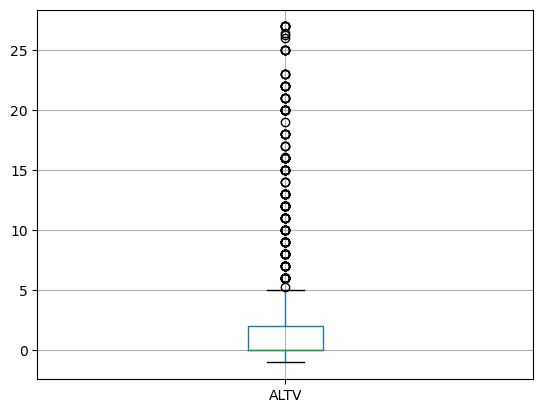

In [111]:
df_cleaned.boxplot('ALTV')

### Filling Null Values

In [113]:
df_cleaned.isnull().sum()

LB            0
AC           28
FM          161
UC            0
DL            0
DS            0
DP            0
ASTV          0
MSTV          0
ALTV          0
MLTV          0
Width         0
Tendency      0
NSP           0
dtype: int64

In [114]:
df_cleaned['AC']=df['AC'].fillna(df['AC'].median())
df_cleaned['FM']=df['FM'].fillna(df['FM'].median())

In [117]:
df_cleaned

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.00000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.00000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
4,131.948232,0.006515,0.00000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
12,131.000000,0.005076,0.00000,0.007614,0.002538,0.0,0.0,28.0,1.4,-0.702936,12.9,66.0,1.000000,1.0
13,131.000000,0.009077,0.00000,0.006051,0.001513,0.0,0.0,28.0,1.5,0.000000,5.4,87.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,136.000000,0.000000,0.00207,0.008282,0.000000,0.0,0.0,67.0,1.5,11.000000,4.7,38.0,0.000000,1.0
2117,140.000000,0.000000,0.00000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
2118,140.000000,0.000000,0.00000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
2119,140.000000,0.000000,0.00000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0


## Statistical Summary

In [129]:

print(df_cleaned.describe())


               LB          AC          FM          UC          DL     DS  \
count  976.000000  976.000000  976.000000  976.000000  976.000000  976.0   
mean   131.769613    0.004030    0.000165    0.004833    0.001422    0.0   
std     11.173322    0.003608    0.000502    0.003190    0.002163    0.0   
min     52.000000   -0.000156   -0.001276   -0.014925   -0.000080    0.0   
25%    125.000000    0.000834    0.000000    0.002867    0.000000    0.0   
50%    132.000000    0.003333    0.000000    0.004933    0.000000    0.0   
75%    138.000000    0.006685    0.000000    0.006766    0.002541    0.0   
max    214.000000    0.012918    0.002261    0.030002    0.008197    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  976.0  976.000000  976.000000  976.000000  976.000000  976.000000   
mean     0.0   41.295610    1.276913    2.872792    8.611859   69.345447   
std      0.0   15.939179    0.545427    5.805608    4.516260   38.292423   
min      0.

## Visualization

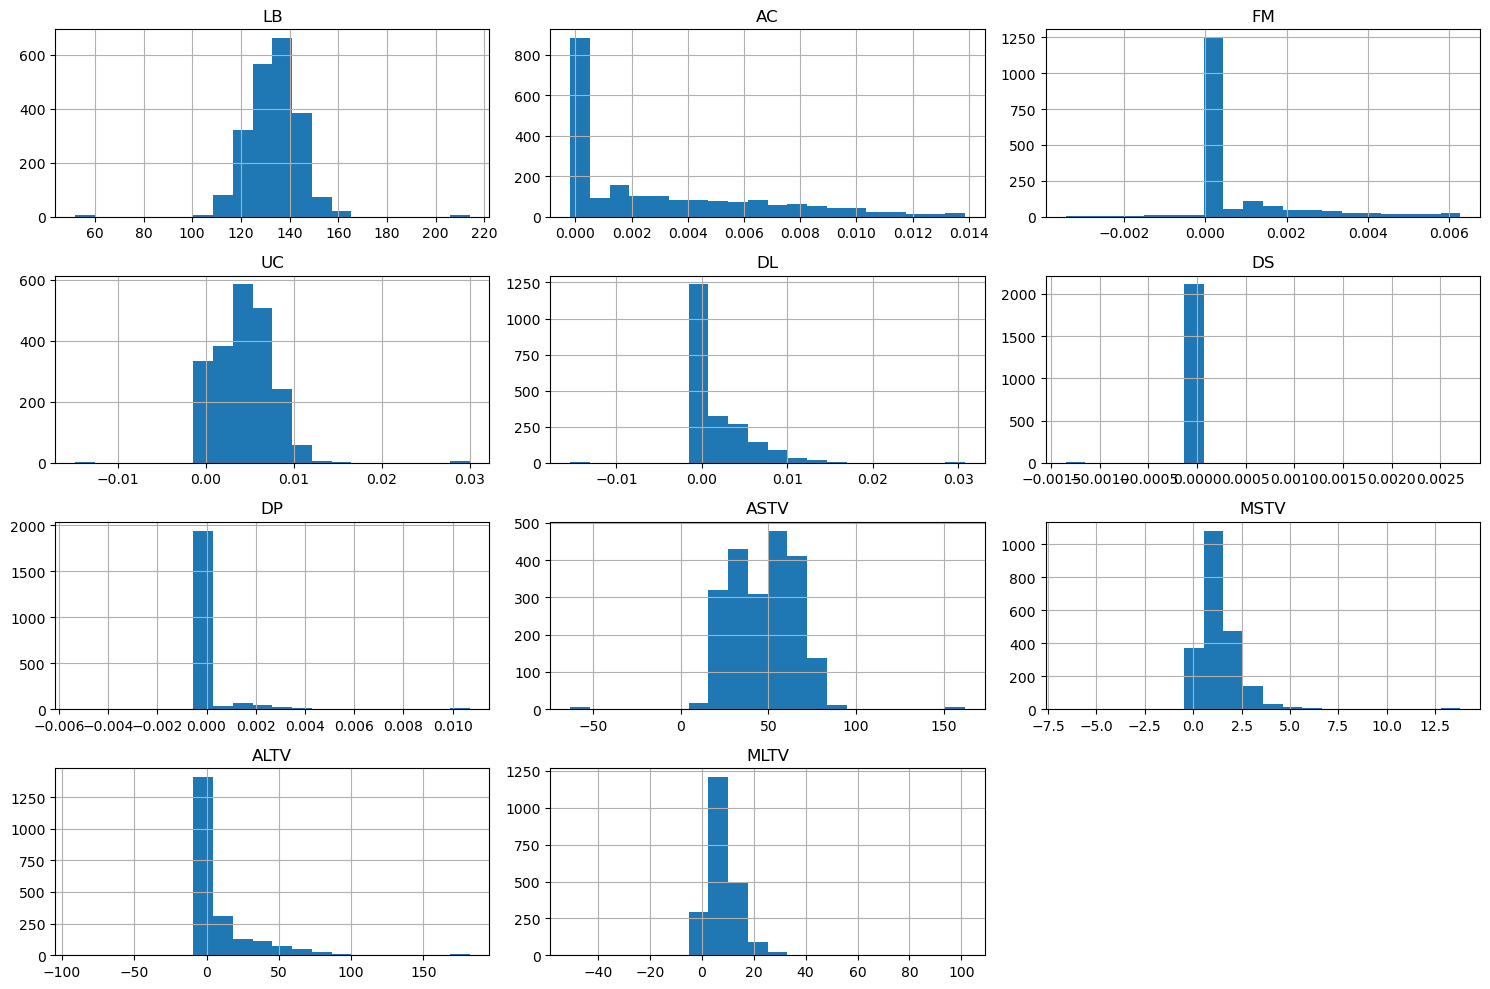

In [125]:
# Histograms for numerical variables
numerical_vars = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']
df[numerical_vars].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

C:\Users\Varun Sayam\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


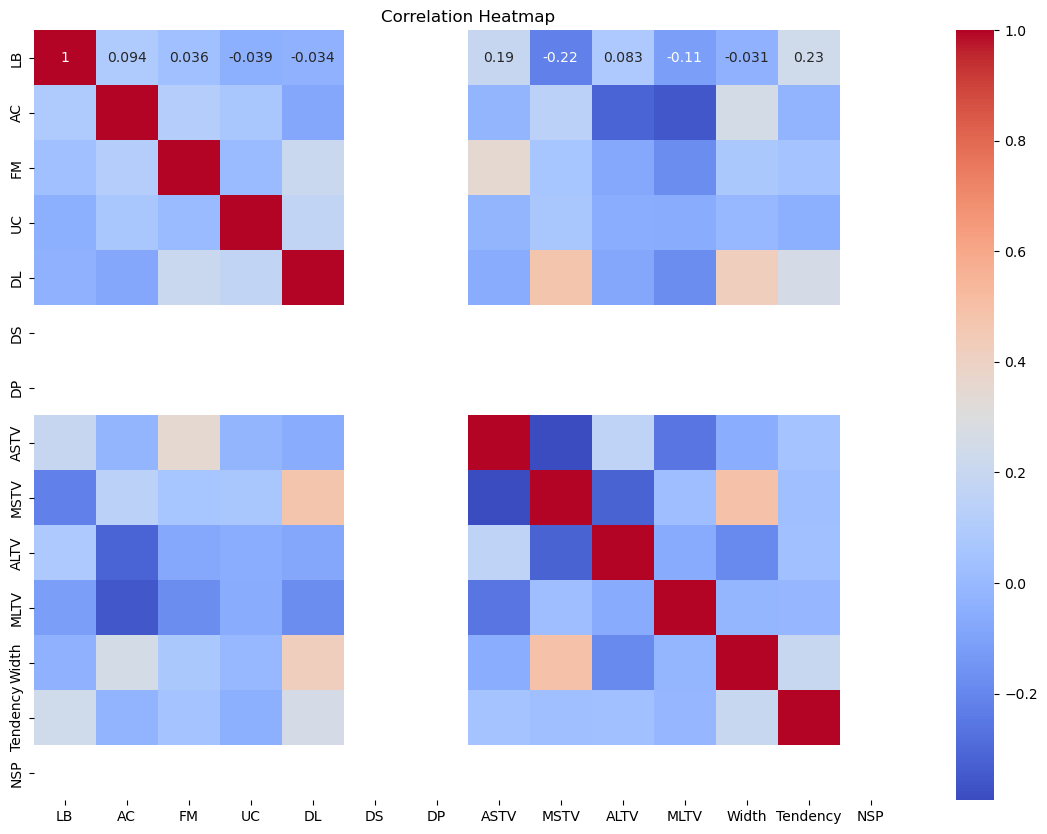

In [130]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Varun Sayam\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Varun Sayam\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Varun Sayam\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Varun Sayam\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

<Figure size 2500x1000 with 0 Axes>

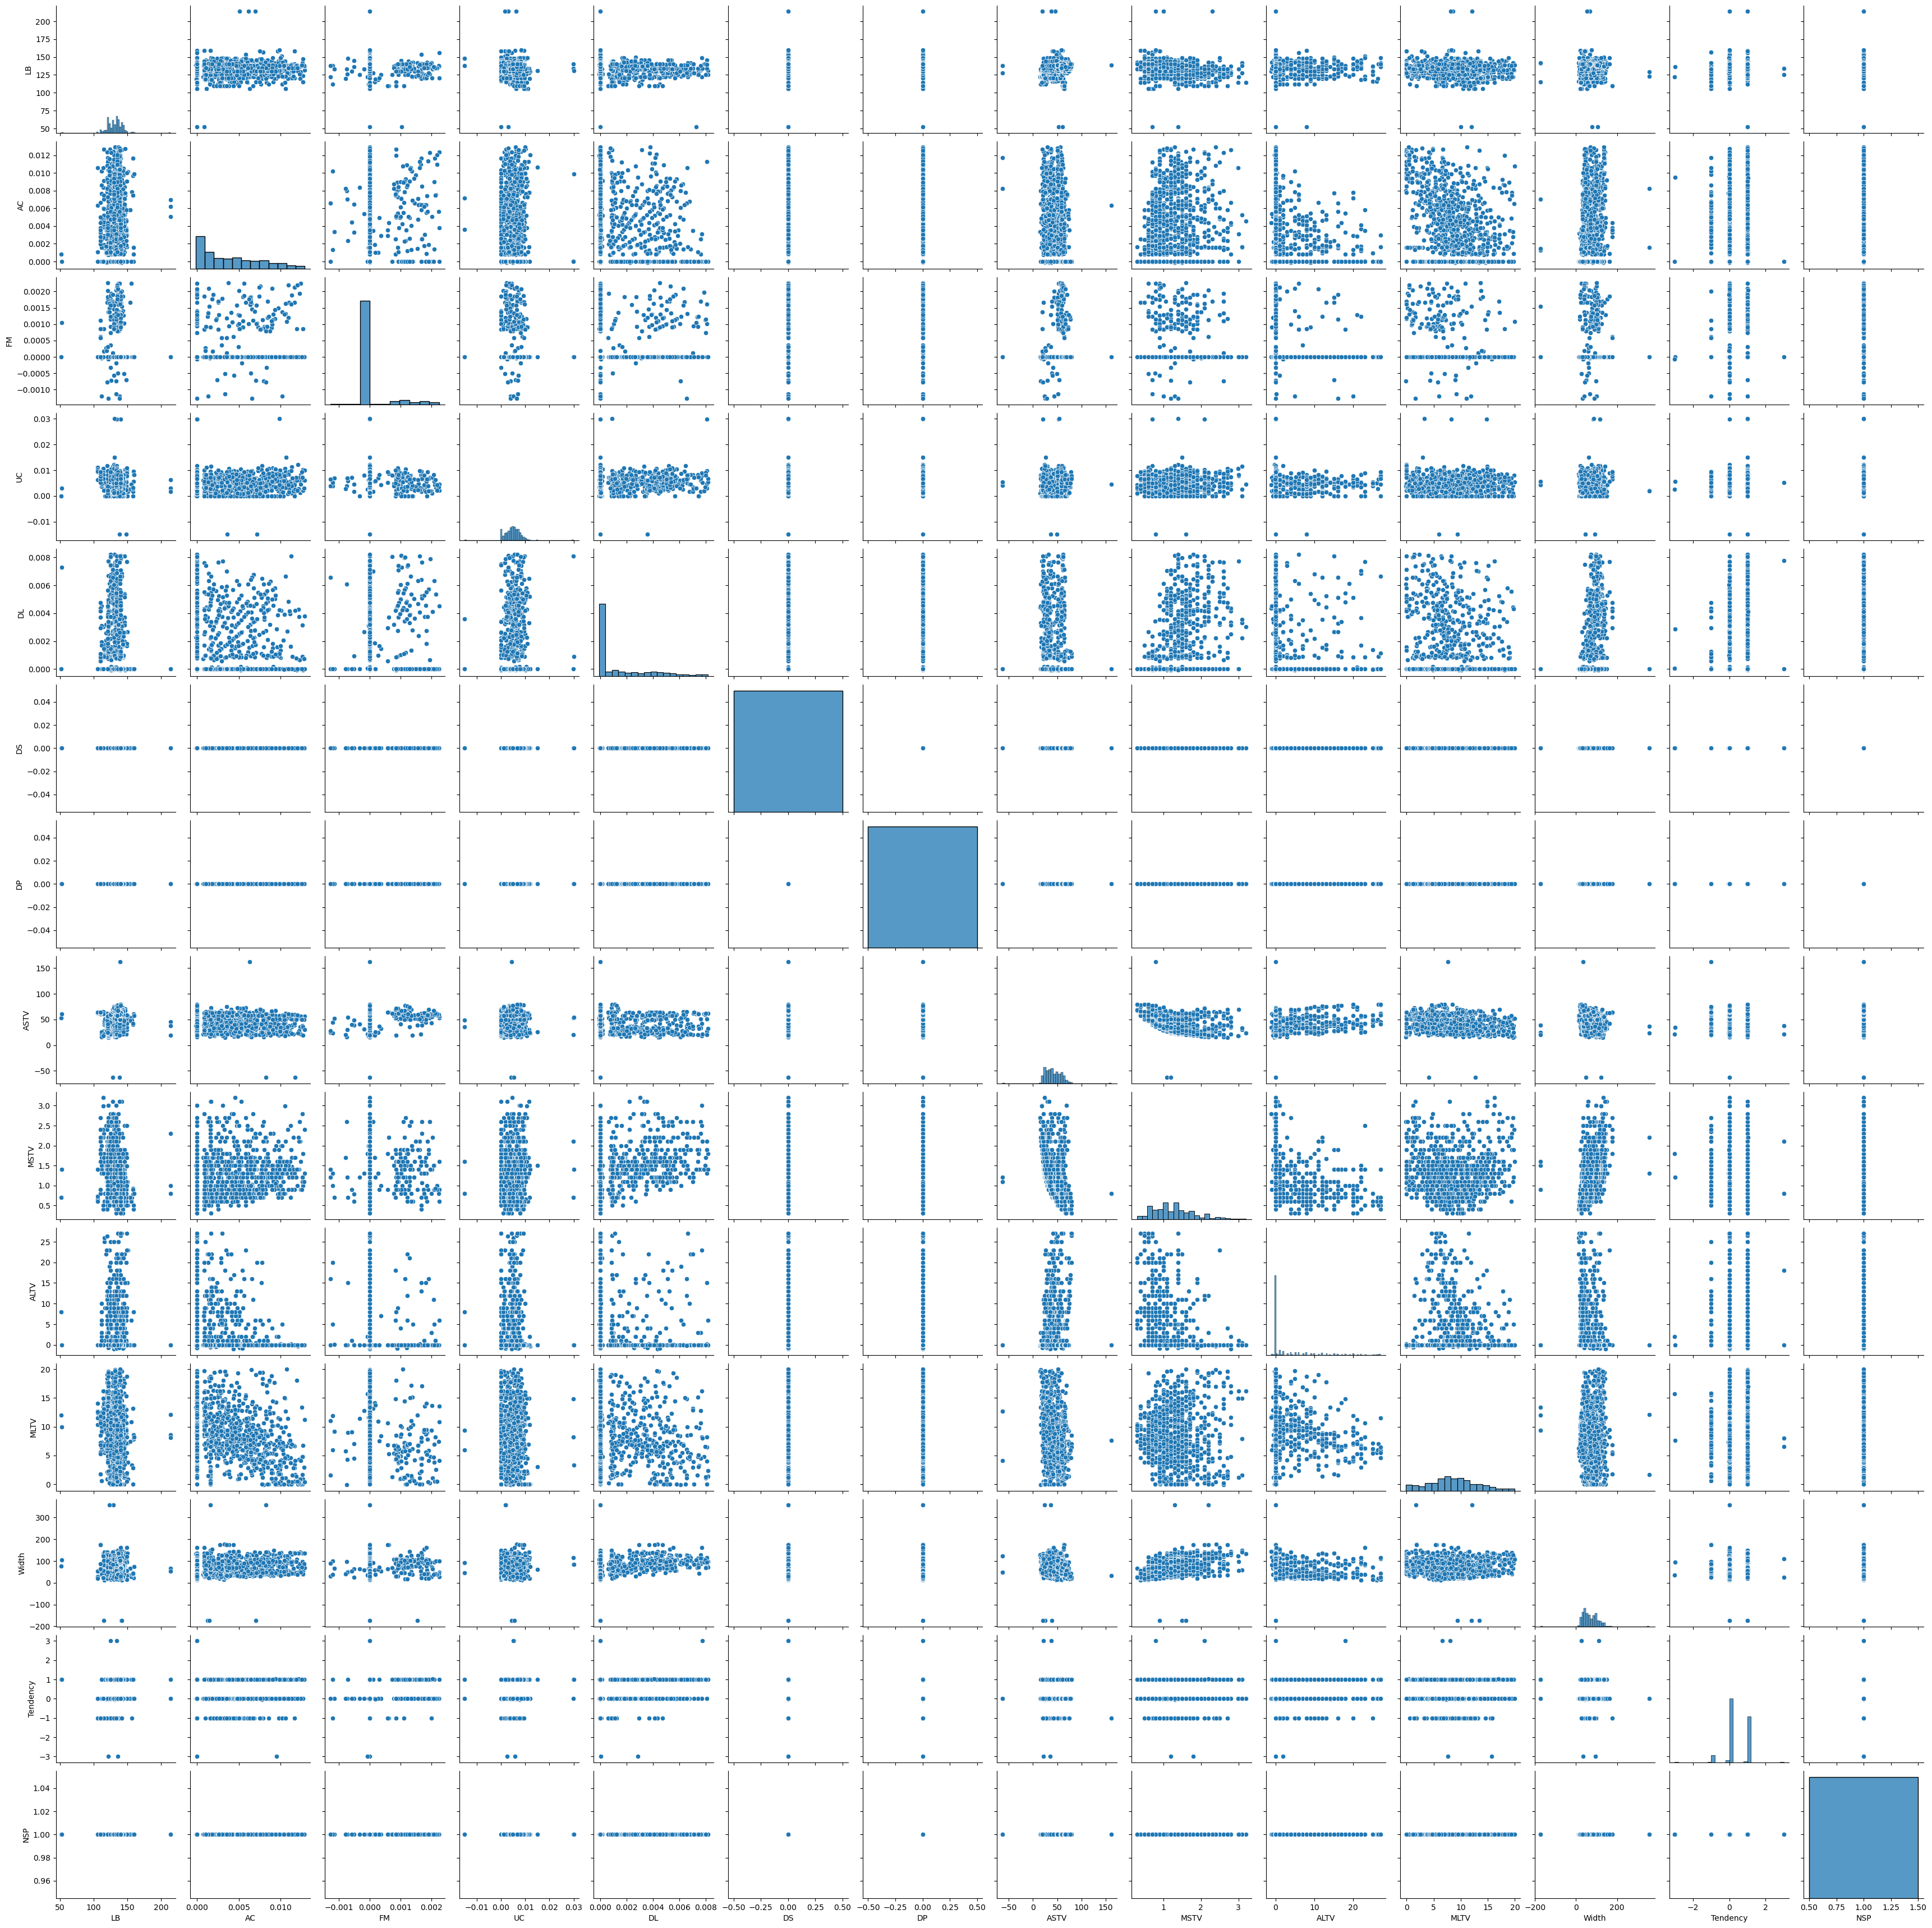

In [135]:
plt.figure(figsize=(25,10))
sns.pairplot(df_cleaned)